In [2]:
! git clone https://github.com/Vova2808/Kaggle_Avocado_Catboost.git

Cloning into 'Kaggle_Avocado_Catboost'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 630.38 KiB | 6.57 MiB/s, done.


In [3]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.3 MB/s eta 0:00:00


# **EDA**

In [56]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Kaggle_Avocado_Catboost/avocado.csv')

In [45]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [47]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>],
       [<Axes: title={'center': '4046'}>,
        <Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>],
       [<Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>],
       [<Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

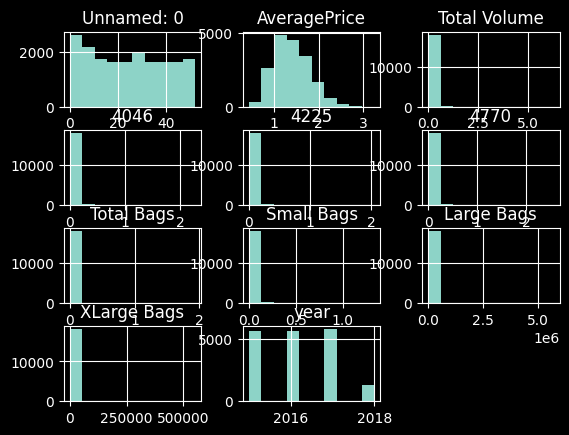

In [7]:
df.hist()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
len(df)

18249

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [15]:
df.shape

(18249, 14)

In [57]:
df1 = df.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,5507,140.54,8.467434e+07,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-11,5399,148.03,7.855581e+07,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-18,5291,150.24,7.838878e+07,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-25,5183,150.89,7.646628e+07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-02-01,5075,134.68,1.194532e+08,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...


<ipython-input-22-b2d4cfa7760c>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AveragePrice']);
<ipython-input-22-b2d4cfa7760c>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['AveragePrice']);


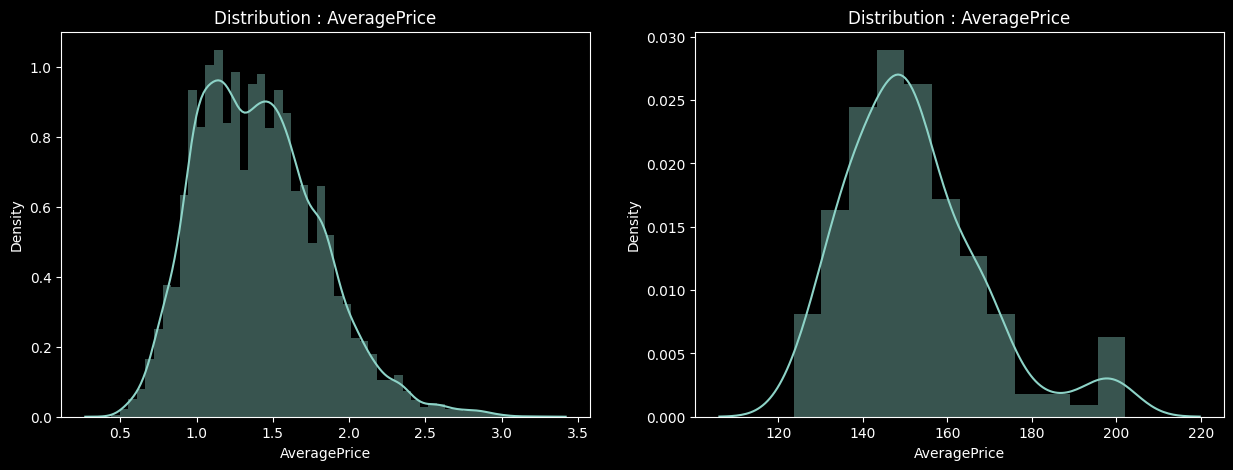

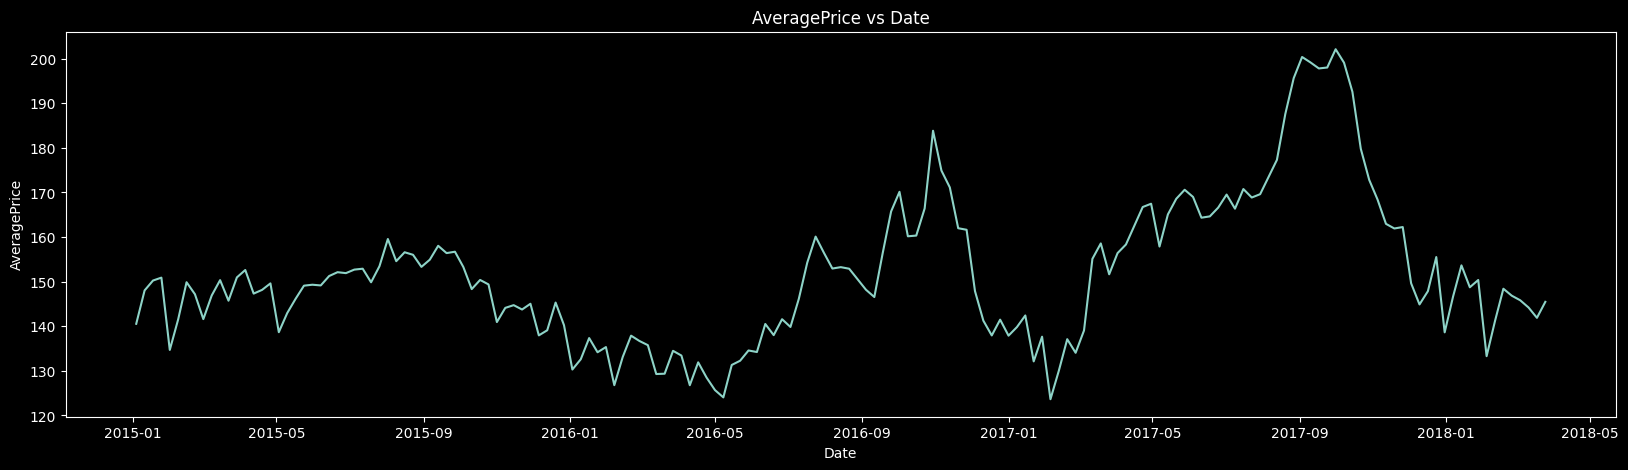

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(df['AveragePrice']);
plt.title('Distribution : AveragePrice')

plt.subplot(1,2,2)
sns.distplot(df1['AveragePrice']);
plt.title('Distribution : AveragePrice')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df1.index ,y = 'AveragePrice',data = df1);
plt.title('AveragePrice vs Date')

plt.show()
fig.tight_layout(pad = 2)

In [26]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

numerical_features.remove('Date')
numerical_features.remove('AveragePrice')
numerical_features.remove('region')
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : type year
Numerical Features : Unnamed: 0 Total Volume 4046 4225 4770 Total Bags Small Bags Large Bags XLarge Bags


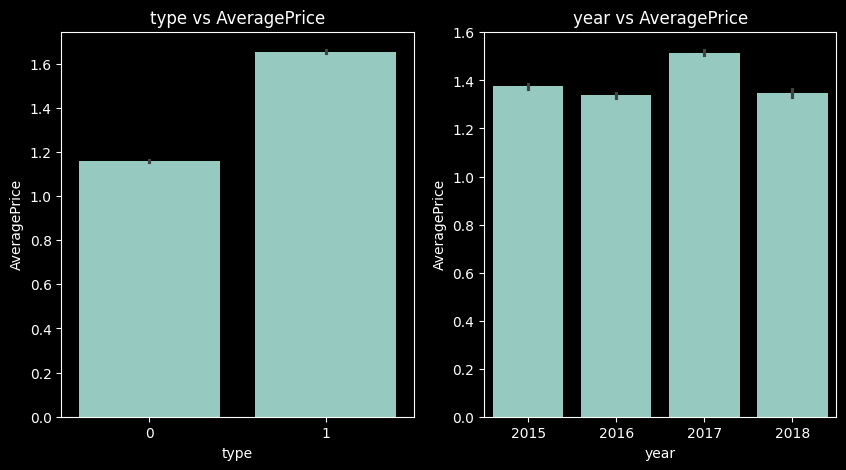

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])


fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):

    plt.subplot(1,2,i+1)
    sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = df)
    title = categorical_features[i] + ' vs AveragePrice'
    plt.title(title);

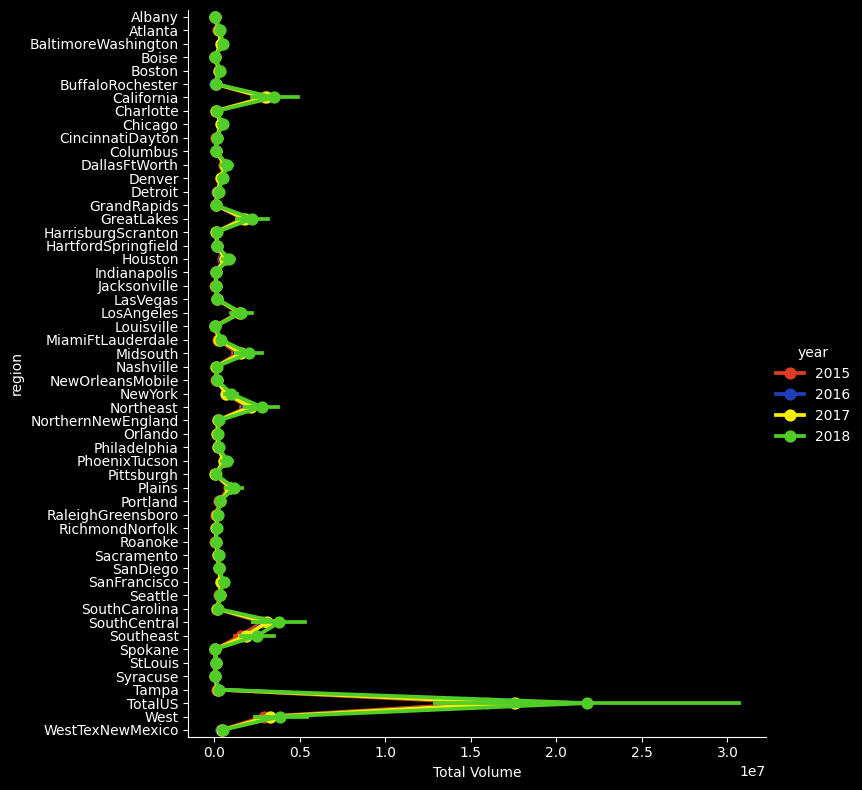

In [31]:
color2 = ['#DF3C22','#203EB9', '#F5EE04','#50CD27']

sns.catplot(x='Total Volume',y='region',data = df,hue = 'year',height = 8,palette = color2,kind = 'point');

# **Machine Learning (Catboost)**

In [83]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,train_size=0.6,random_state=42)
val, test = train_test_split(test,train_size=0.5,random_state=42)

In [84]:
len(test)

3650

In [85]:
len(val)

3650

In [86]:
len(train)

10949

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10949 entries, 7578 to 15795
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10949 non-null  int64  
 1   Date          10949 non-null  object 
 2   AveragePrice  10949 non-null  float64
 3   Total Volume  10949 non-null  float64
 4   4046          10949 non-null  float64
 5   4225          10949 non-null  float64
 6   4770          10949 non-null  float64
 7   Total Bags    10949 non-null  float64
 8   Small Bags    10949 non-null  float64
 9   Large Bags    10949 non-null  float64
 10  XLarge Bags   10949 non-null  float64
 11  type          10949 non-null  object 
 12  year          10949 non-null  int64  
 13  region        10949 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.3+ MB


In [88]:
train.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [65]:
from catboost import Pool, CatBoostRegressor

In [66]:
X = ['Date', 'AveragePrice', 'Total Volume',
    'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
    'type', 'year', 'region']

cat_features = ['Date', 'type', 'region']

y = ['AveragePrice']

In [67]:
parameters = {'cat_features': cat_features,
              'iterations' : 1000,
              'eval_metric': 'RMSE',
              'loss_function' : 'RMSE',
              'learning_rate': 0.01,
              'random_seed':42,
              'verbose':100}


In [68]:
model = CatBoostRegressor(**parameters)

In [69]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.3989863	test: 0.3978085	best: 0.3978085 (0)	total: 12.5ms	remaining: 12.5s
100:	learn: 0.1607597	test: 0.1594223	best: 0.1594223 (100)	total: 1.06s	remaining: 9.49s
200:	learn: 0.0663845	test: 0.0652397	best: 0.0652397 (200)	total: 2.01s	remaining: 8s
300:	learn: 0.0285586	test: 0.0282273	best: 0.0282273 (300)	total: 3.05s	remaining: 7.08s
400:	learn: 0.0135580	test: 0.0139533	best: 0.0139533 (400)	total: 5.43s	remaining: 8.11s
500:	learn: 0.0076518	test: 0.0084745	best: 0.0084745 (500)	total: 7.49s	remaining: 7.46s
600:	learn: 0.0052742	test: 0.0062245	best: 0.0062245 (600)	total: 9.17s	remaining: 6.09s
700:	learn: 0.0042797	test: 0.0051894	best: 0.0051894 (700)	total: 10s	remaining: 4.28s
800:	learn: 0.0038129	test: 0.0046500	best: 0.0046500 (800)	total: 10.9s	remaining: 2.71s
900:	learn: 0.0035605	test: 0.0043521	best: 0.0043521 (900)	total: 11.8s	remaining: 1.3s
999:	learn: 0.0034087	test: 0.0041544	best: 0.0041544 (999)	total: 12.7s	remaining: 0us

bestTest = 0.0041543

In [90]:
train['price_pred'] = model.predict(train[X])
test['price_pred'] = model.predict(test[X])
val['price_pred'] = model.predict(val[X])

In [91]:
test

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price_pred
14384,7,2016-11-06,2.02,1894.26,14.17,965.27,0.00,914.82,26.67,888.15,0.00,organic,2016,Spokane,2.018574
6551,34,2017-05-07,1.61,369499.67,6754.65,251849.93,310.83,110584.26,109324.82,974.72,284.72,conventional,2017,HartfordSpringfield,1.611372
12320,23,2016-07-17,1.58,7940.49,342.54,3579.56,1379.56,2638.83,2625.50,13.33,0.00,organic,2016,Charlotte,1.576196
7816,27,2017-06-25,1.05,586241.71,212203.54,131972.03,19457.18,222608.96,220632.65,197.32,1778.99,conventional,2017,SanDiego,1.053053
7563,39,2017-04-02,1.12,672306.68,152601.88,137424.85,20885.20,361394.75,359313.65,1923.63,157.47,conventional,2017,Portland,1.123896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,15,2017-09-17,2.12,3779.04,9.05,993.21,0.00,2776.78,713.34,2063.44,0.00,organic,2017,Louisville,2.126749
9438,0,2015-12-27,1.45,98576.63,14306.68,50893.97,0.00,33375.98,29507.45,3868.53,0.00,organic,2015,California,1.452561
12699,38,2016-04-03,1.56,1409.23,78.55,868.21,0.00,462.47,450.00,12.47,0.00,organic,2016,GrandRapids,1.563629
9703,5,2015-11-22,1.46,10812.09,6189.69,271.59,0.00,4350.81,4350.81,0.00,0.00,organic,2015,DallasFtWorth,1.459833


In [93]:
test['error_abs'] = abs(test['AveragePrice'] - test['price_pred'])
test['error'] = test['AveragePrice'] - test['price_pred']

array([[<Axes: title={'center': 'error'}>,
        <Axes: title={'center': 'error_abs'}>]], dtype=object)

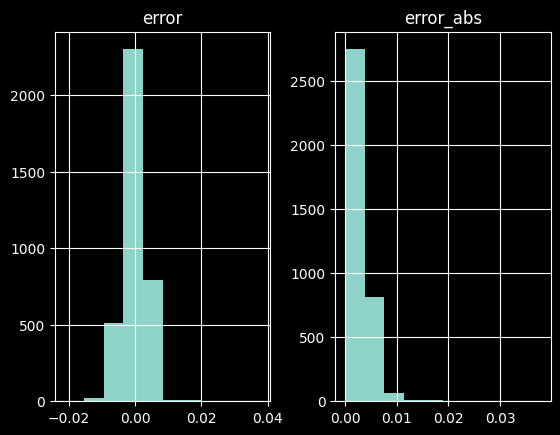

In [94]:
test[['error', 'error_abs']].hist()

In [95]:
test['error'].mean()

-7.057212943019343e-05

MAE: 0.0026801544362637856
MSE: 1.725888633618014e-05
RMSE: 0.004154381582880915
R^2: 0.9998929323286576


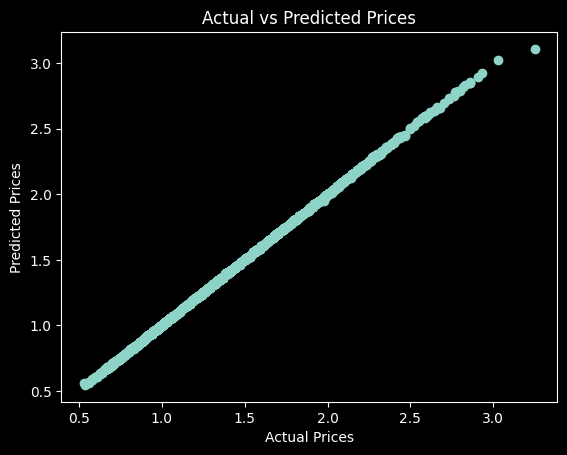

In [96]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(val[X])

y_true = val[y]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


plt.scatter(y_true, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

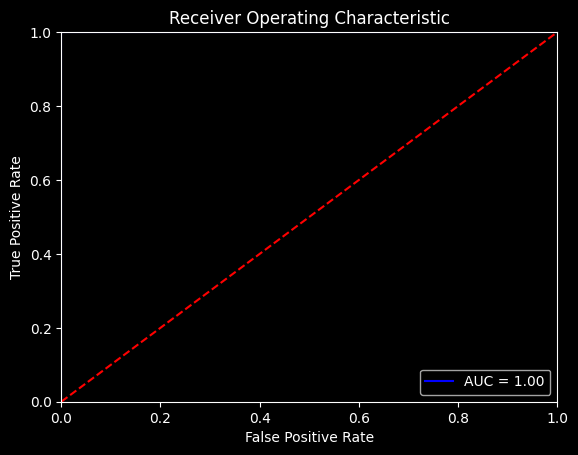

In [109]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

threshold = 2.0

binary_true_labels = (test['AveragePrice'] > threshold).astype(int)
binary_pred_labels = (test['price_pred'] > threshold).astype(int)

fpr, tpr, thresholds = metrics.roc_curve(binary_true_labels, test['price_pred'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc:.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [100]:
error(test['AveragePrice'],test['price_pred'])

0.0026733949585639157
0.0020307625380591656


In [101]:
test['error_abs'].describe()

count    3650.000000
mean        0.002673
std         0.002335
min         0.000002
25%         0.001039
50%         0.002191
75%         0.003770
max         0.037896
Name: error_abs, dtype: float64

In [102]:
test.sort_values('error_abs',ascending=False).head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price_pred,error_abs,error
17514,17,2017-09-03,2.52,143490.06,19509.00,32862.27,50.28,91068.51,51643.01,39324.06,101.44,organic,2017,West,2.482104,0.037896,0.037896
17462,18,2017-08-27,2.09,1045992.02,112812.39,250861.84,2119.14,680088.21,588832.95,91249.96,5.30,organic,2017,TotalUS,2.065476,0.024524,0.024524
17038,18,2017-08-27,2.96,26845.68,1134.59,11055.60,12.57,14642.92,1079.26,13563.66,0.00,organic,2017,Seattle,2.938382,0.021618,0.021618
16162,43,2017-03-05,0.51,17135.45,481.81,1790.33,0.00,14863.31,122.78,14740.53,0.00,organic,2017,Nashville,0.531216,0.021216,-0.021216
11324,14,2015-09-20,2.79,15197.42,1209.92,13971.53,0.00,15.97,15.97,0.00,0.00,organic,2015,SanFrancisco,2.769043,0.020957,0.020957
11320,10,2015-10-18,2.79,12642.11,961.55,11680.56,0.00,0.00,0.00,0.00,0.00,organic,2015,SanFrancisco,2.769253,0.020747,0.020747
15131,19,2017-08-20,2.48,10482.69,92.36,4682.08,200.75,5507.50,5500.83,6.67,0.00,organic,2017,Charlotte,2.460454,0.019546,0.019546
15820,19,2017-08-20,2.48,2855.78,302.40,1483.20,2.40,1067.78,1067.78,0.00,0.00,organic,2017,Jacksonville,2.461130,0.018870,0.018870
15144,32,2017-05-21,2.48,7285.09,256.65,4833.23,438.64,1756.57,1582.88,173.69,0.00,organic,2017,Charlotte,2.461572,0.018428,0.018428
17510,13,2017-10-01,2.45,122625.26,16845.73,24294.75,25.18,81459.60,44948.19,36434.83,76.58,organic,2017,West,2.431903,0.018097,0.018097


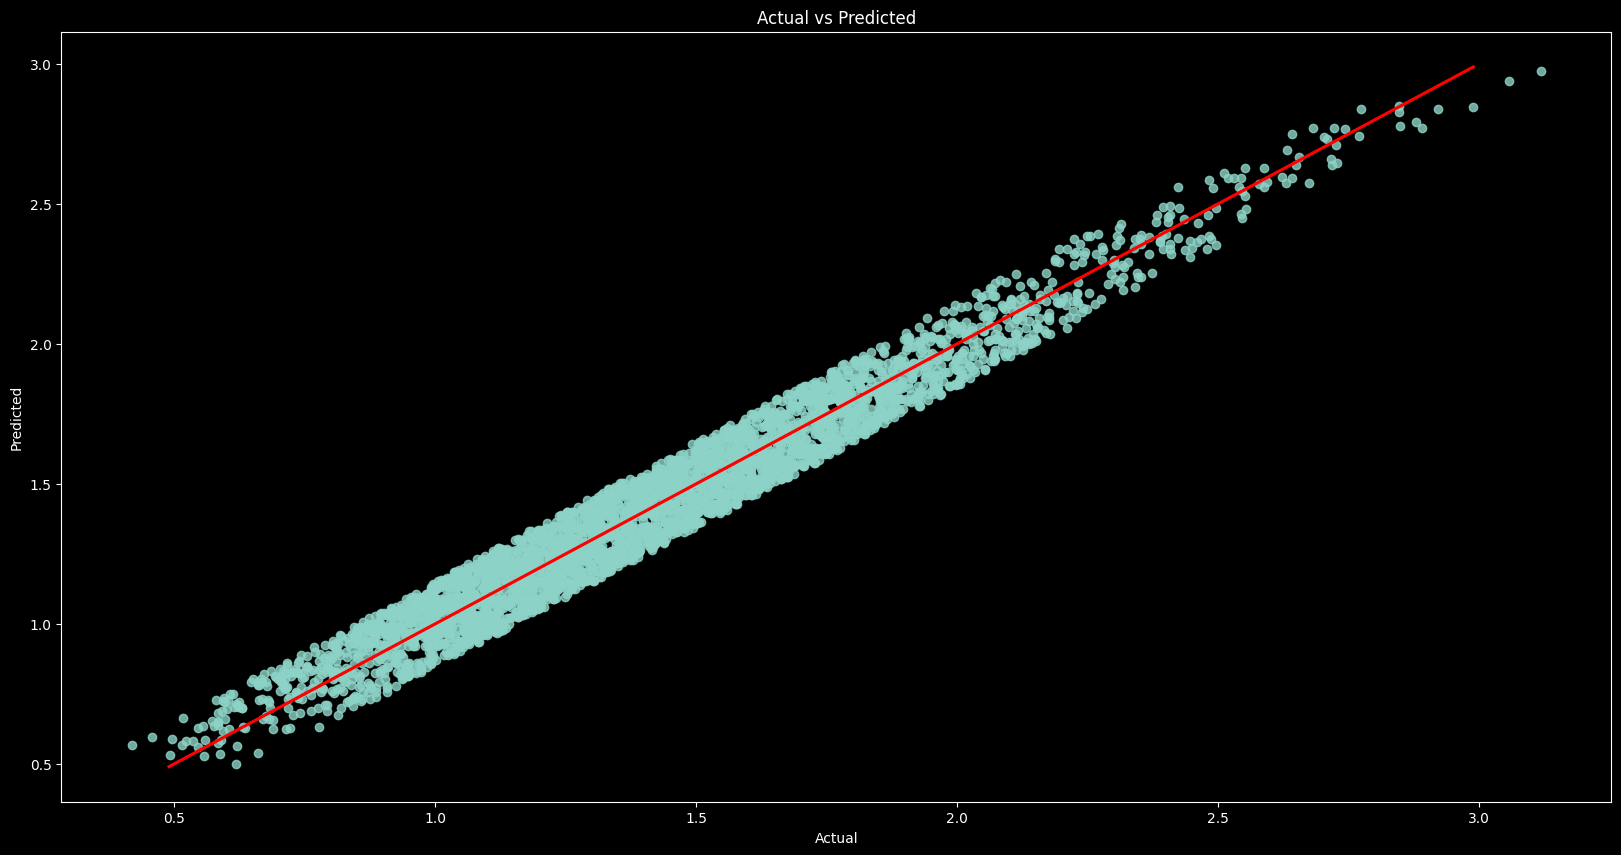

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
sns.regplot(data=df, x=test['AveragePrice'], y=test['price_pred'], x_jitter=.15, line_kws=dict(color="r"),)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.ticklabel_format(style = 'plain')